In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
df=pd.read_csv("data.csv")
df

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20
5,1.60,58.57
6,1.63,59.93
7,1.65,61.29
8,1.68,63.11
9,1.70,64.47


In [10]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


Text(0, 0.5, "['Height']")

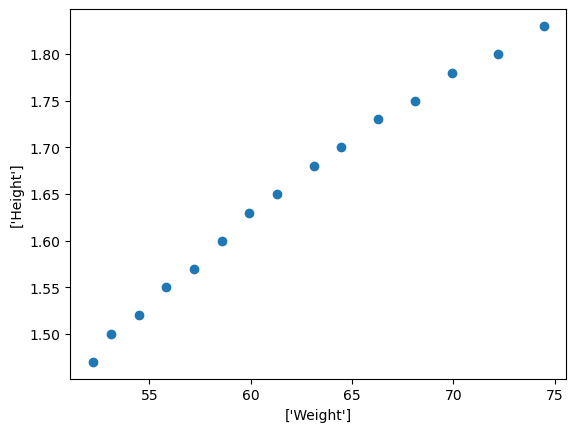

In [12]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel(["Weight"])
plt.ylabel(["Height"])

In [14]:
df.corr()

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


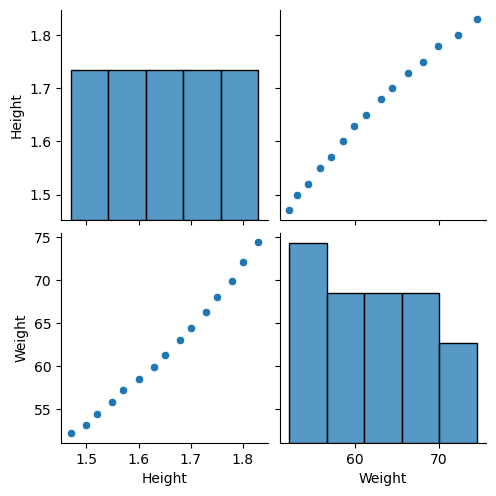

In [16]:
import seaborn as sns
sns.pairplot(df)

In [18]:
x=df[['Weight']]
y=df['Height']

In [20]:
print(x.shape)
print(y.shape)

(15, 1)
(15,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [58]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [32]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [34]:
slope=regressor.coef_
print(slope)

[0.11836681]


In [36]:
intercept=regressor.intercept_
print(intercept)

1.6590909090909094


In [38]:
y_pred=regressor.predict(x_train)

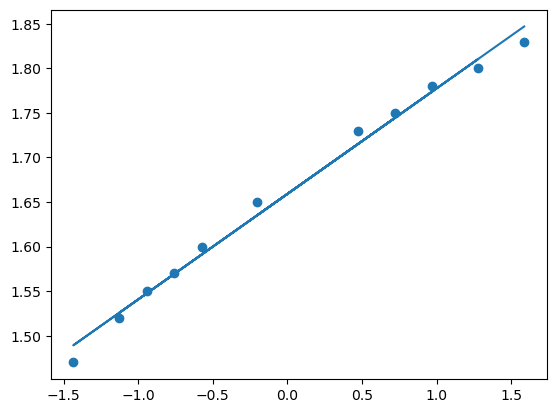

In [40]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_pred)

In [48]:
y_pred_test=regressor.predict(X_test)

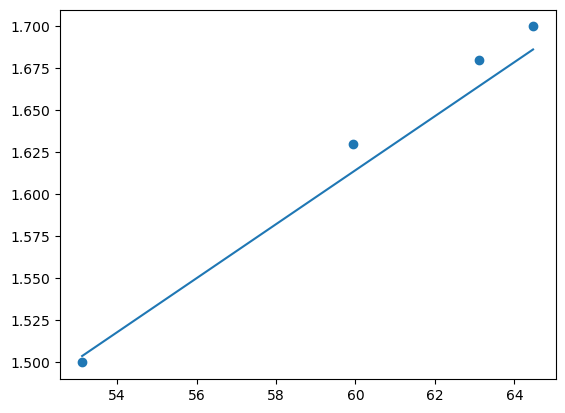

In [90]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred_test)

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print(f"Mean Absolute Error (MAE):{mae}")
print(f"Mean Squared Error (MSE):{mse}")
print(f"Root Mean Squared Error (RMSE):{rmse}")
print(f"R2 Score:{r2}")

Mean Absolute Error (MAE):0.012438076526499309
Mean Squared Error (MSE):0.000180383647990778
Root Mean Squared Error (RMSE):0.013430697971095099
R2 Score:0.9702766388480695


In [94]:
new_pred=regressor.predict(scaler.transform([[60]]))
new_pred

array([8.76109969])